## **HeartDisease ML Imputations**

In [ ]:
import pandas as pd

In [ ]:
hdb = pd.read_csv('/content/heart_disease_uci.csv')

In [ ]:
hdb_original = hdb.copy()

In [ ]:
hdb

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
hdb.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='distance')
num_cols = hdb.select_dtypes(include=['int64', 'float64']).columns
hdb[num_cols] = imputer.fit_transform(hdb[num_cols])

In [ ]:
hdb

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2.0
2,3.0,67.0,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916.0,54.0,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,NaN,0.917490,NaN,1.0
916,917.0,62.0,Male,VA Long Beach,typical angina,149.515465,139.0,False,st-t abnormality,134.606682,NaN,1.618566,NaN,0.879188,NaN,0.0
917,918.0,55.0,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,NaN,1.061530,fixed defect,2.0
918,919.0,58.0,Male,VA Long Beach,asymptomatic,136.601404,385.0,True,lv hypertrophy,135.009536,NaN,0.692788,NaN,0.742459,NaN,0.0


In [ ]:
hdb.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,90
restecg,2
thalch,0


In [ ]:
cat_cols = ['cp', 'restecg', 'slope', 'thal']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

for col in cat_cols:
    known = hdb[hdb[col].notnull()]
    unknown = hdb[hdb[col].isnull()]

    if unknown.empty:
        continue

    X_train = known.drop(col, axis=1)
    y_train = known[col]

    X_pred = unknown.drop(col, axis=1)

    # One-hot encoding for categorical features
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_pred  = pd.get_dummies(X_pred, drop_first=True)

    # Align columns
    X_pred = X_pred.reindex(columns=X_train.columns, fill_value=0)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    hdb.loc[hdb[col].isnull(), col] = model.predict(X_pred)

In [ ]:
hdb.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,90
restecg,0
thalch,0


In [ ]:
bool_cols = ['exang', 'fbs']

for col in bool_cols:
    known = hdb[hdb[col].notnull()]
    unknown = hdb[hdb[col].isnull()]

    if unknown.empty:
        continue

    X_train = known.drop(col, axis=1)
    y_train = known[col].astype(str)
    X_pred  = unknown.drop(col, axis=1)

    # One-hot encode
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_pred  = pd.get_dummies(X_pred, drop_first=True)
    X_pred = X_pred.reindex(columns=X_train.columns, fill_value=0)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predict and convert into true or false
    preds = model.predict(X_pred)
    preds = [1 if p=='True' else 0 for p in preds]

    hdb.loc[hdb[col].isnull(), col] = preds


In [ ]:
hdb.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [ ]:
hdb

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2.0
2,3.0,67.0,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916.0,54.0,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.917490,normal,1.0
916,917.0,62.0,Male,VA Long Beach,typical angina,149.515465,139.0,False,st-t abnormality,134.606682,1,1.618566,flat,0.879188,reversable defect,0.0
917,918.0,55.0,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,1.061530,fixed defect,2.0
918,919.0,58.0,Male,VA Long Beach,asymptomatic,136.601404,385.0,True,lv hypertrophy,135.009536,1,0.692788,flat,0.742459,reversable defect,0.0


In [ ]:
hdb['fbs'].unique()

array([True, False], dtype=object)

In [ ]:
hdb['exang'].unique()

array([False, True], dtype=object)

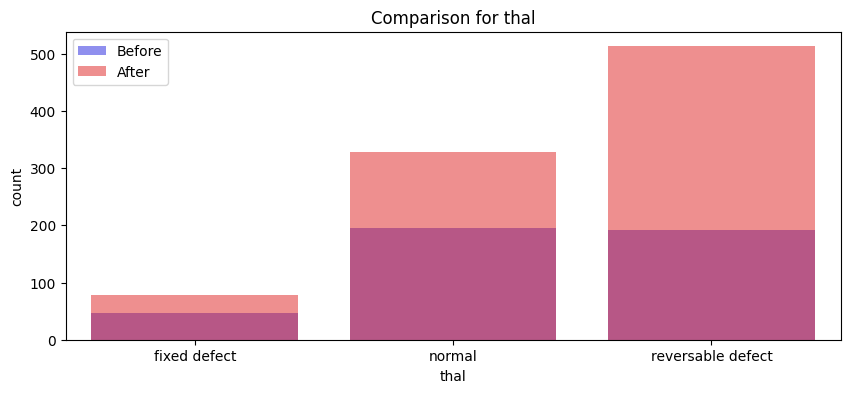

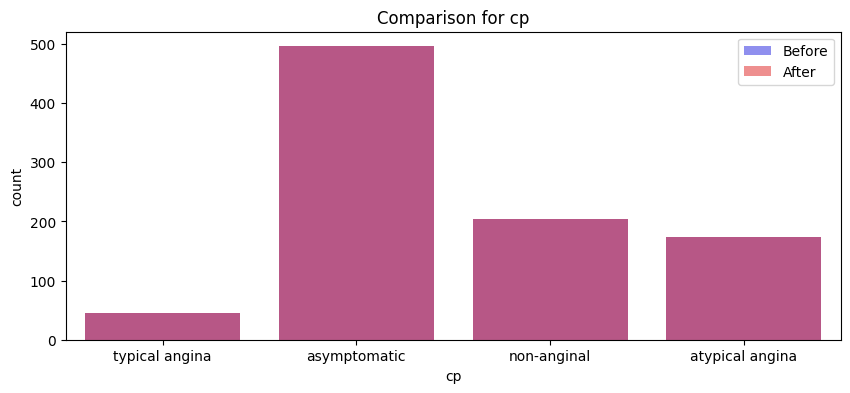

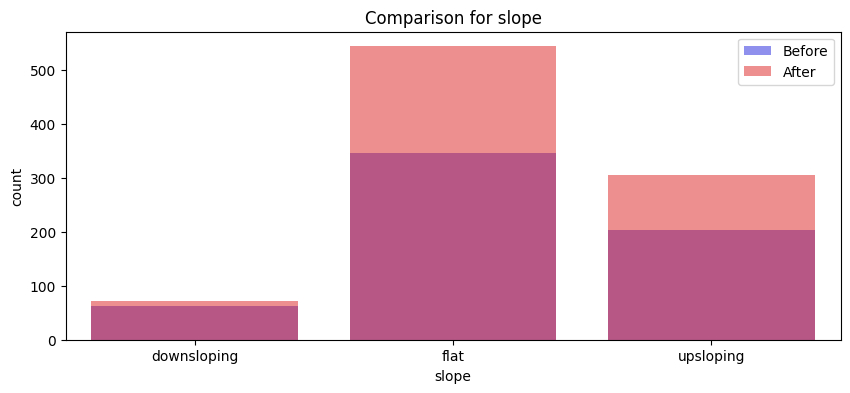

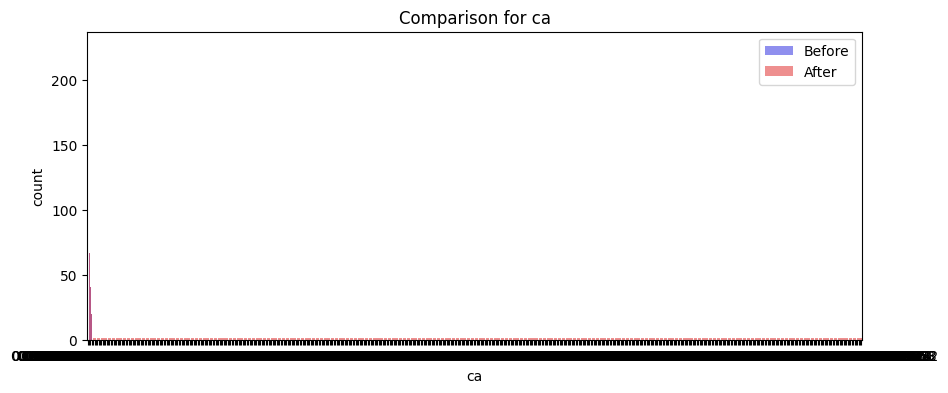

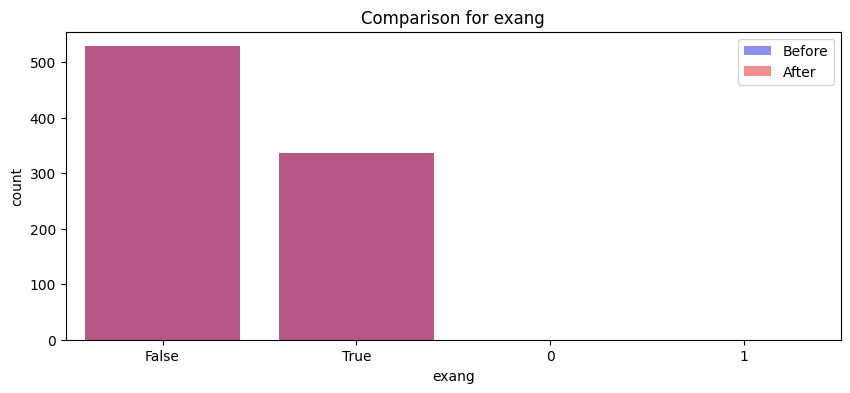

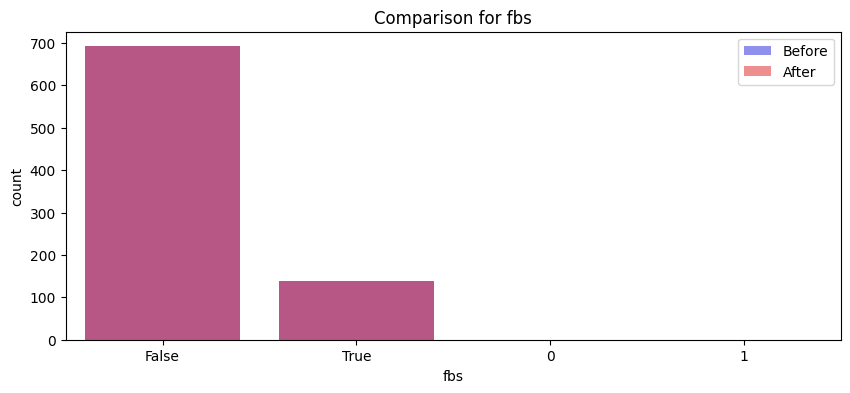

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['thal', 'cp', 'slope', 'ca', 'exang', 'fbs']

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=hdb_original, color='blue', alpha=0.5, label='Before')
    sns.countplot(x=col, data=hdb, color='red', alpha=0.5, label='After')
    plt.title(f'Comparison for {col}')
    plt.legend()
    plt.show()


In [ ]:
print(hdb_original.mean(numeric_only=True))
print(hdb.mean(numeric_only=True))

id          460.500000
age          53.510870
trestbps    132.132404
chol        199.130337
thalch      137.545665
oldpeak       0.878788
ca            0.676375
num           0.995652
dtype: float64
id          460.500000
age          53.510870
trestbps    132.286807
chol        200.863877
thalch      136.867210
oldpeak       0.913583
ca            0.717716
num           0.995652
dtype: float64


In [ ]:
hdb

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2.0
2,3.0,67.0,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916.0,54.0,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.917490,normal,1.0
916,917.0,62.0,Male,VA Long Beach,typical angina,149.515465,139.0,False,st-t abnormality,134.606682,1,1.618566,flat,0.879188,reversable defect,0.0
917,918.0,55.0,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,1.061530,fixed defect,2.0
918,919.0,58.0,Male,VA Long Beach,asymptomatic,136.601404,385.0,True,lv hypertrophy,135.009536,1,0.692788,flat,0.742459,reversable defect,0.0
